In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import scale
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
import sklearn
%matplotlib inline

In [3]:
trip_dataset = pd.read_csv('../Datasets/trip_dataset.csv')

In [4]:
x = trip_dataset[['pickup_longitude','pickup_latitude','dropoff_longitude',
                 'dropoff_latitude','pickup_datetime_int','distance','rain','temp','snow','windspeed']].fillna(0)

#x = scale(x)

In [5]:
trip_dataset['trip_duration'] = np.log(trip_dataset['trip_duration'])
y = trip_dataset['trip_duration']

In [20]:
lr = LinearRegression()
knn = KNeighborsRegressor()
ridge = Ridge(random_state=1)
lasso = Lasso()
svr_rbf = SVR(kernel='rbf')
#https://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/
stregr = StackingRegressor(regressors=[lasso, lr, ridge,knn],
                           meta_regressor=svr_rbf)

In [21]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [22]:
results = model_selection.cross_val_score(stregr, x, y, cv=kfold)
Y_pred =  model_selection.cross_val_predict(stregr, x, y, cv=kfold)
print(np.sqrt(results.mean()))

0.989936380239


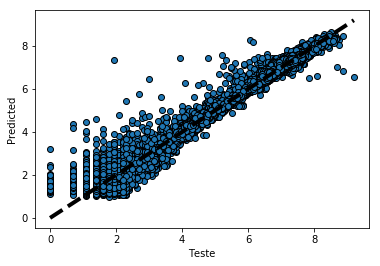

In [23]:
#http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py
fig, ax = plt.subplots()
ax.scatter(y, Y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Teste')
ax.set_ylabel('Predicted')
plt.show()

In [24]:
print(r2_score(y, Y_pred, multioutput='variance_weighted'))

0.979965253399
